<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module3_convnets/CNN_Depth_and_Residual_Connections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [2]:
( train_images, train_labels ), ( test_images, test_labels ) = mnist.load_data()

print('Validation dataset:')
print(test_images.shape)
print(test_labels.shape)

Validation dataset:
(10000, 28, 28)
(10000,)


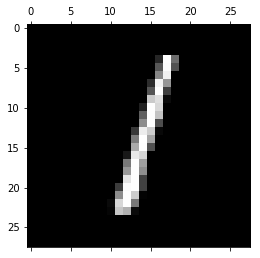

1


In [3]:
plt.matshow( test_images[2], cmap = 'gray')
plt.show()
print(test_labels[2])

#### Use the Test Set to do the training (because it is smaller)

In [4]:
train_images = test_images.reshape( ( 10000, 28, 28, 1 ) )

train_images = train_images.astype( 'float32' ) / 255

print("Before:")
print( test_labels.shape )
print( test_labels[0] )

train_labels = to_categorical( test_labels )

print("After:")
print( train_labels.shape )
print( train_labels[0] )

Before:
(10000,)
7
After:
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
input_img = Input(shape=(28,28,1))

output1 = Conv2D(16, (5, 5), activation='relu')(input_img)

for i in range(16):
    output2 = Conv2D(16, (5, 5), padding = 'same', activation='relu')(output1)
    output1 = output2

output3 = Flatten()(output2)
output4 = Dense(units = 16, activation = 'relu')(output3)
output5 = Dense(units = 16, activation = 'relu')(output4)
output6 = Dense(units = 10, activation = 'softmax')(output5)

model = Model(inputs=input_img, outputs=output6)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 24, 24, 16)        6416      
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 24, 24, 16)        6416      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 24, 24, 16)        6416      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 24, 24, 16)        6416      
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 24, 24, 16)        6416      
__________

----------

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file = 'standardcnn.png')
from google.colab import files
files.download('standardcnn.png')

In [16]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 11s 1ms/step - loss: 2.3022 - acc: 0.1106 - val_loss: 2.3012 - val_acc: 0.1150
Epoch 2/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 3/8
8000/8000 [==============================] - 11s 1ms/step - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 4/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 5/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3008 - val_acc: 0.1150
Epoch 6/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3013 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1150
Epoch 7/8
8000/8000 [==============================] - 10s 1ms/step - loss: 2.3014 - acc: 0.1131 - val_loss: 2.3010 - val_acc: 0.1150
Epoch 8/8
8000

-------
### Make the connections residual

In [10]:
input_img = Input(shape=(28,28,1))

output1 = Conv2D(16, (5, 5), activation='relu')(input_img)

for i in range(16):
    output2 = Conv2D(16, (5, 5), padding = 'same', activation='relu')(output1)
    output2 = add([output1, output2])
    output1 = output2

output3 = Flatten()(output2)
output4 = Dense(units = 16, activation = 'relu')(output3)
output5 = Dense(units = 16, activation = 'relu')(output4)
output6 = Dense(units = 10, activation = 'softmax')(output5)

model = Model(inputs=input_img, outputs=output6)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 24, 24, 16)   416         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 24, 24, 16)   6416        conv2d_86[0][0]                  
__________________________________________________________________________________________________
add_81 (Add)                    (None, 24, 24, 16)   0           conv2d_86[0][0]                  
                                                                 conv2d_87[0][0]                  
__________

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file = 'residual.png')
from google.colab import files
files.download('residual.png')

In [11]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 15s 2ms/step - loss: 1.0354 - acc: 0.7185 - val_loss: 0.2385 - val_acc: 0.9280
Epoch 2/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.2590 - acc: 0.9200 - val_loss: 0.2219 - val_acc: 0.9390
Epoch 3/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.1679 - acc: 0.9457 - val_loss: 0.1532 - val_acc: 0.9570
Epoch 4/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.1321 - acc: 0.9590 - val_loss: 0.0921 - val_acc: 0.9705
Epoch 5/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.1054 - acc: 0.9665 - val_loss: 0.2065 - val_acc: 0.9480
Epoch 6/8
8000/8000 [==============================] - 10s 1ms/step - loss: 0.0863 - acc: 0.9725 - val_loss: 0.1225 - val_acc: 0.9630
Epoch 7/8
8000/8000 [==============================] - 11s 1ms/step - loss: 0.0765 - acc: 0.9759 - v

------
#### Deeper?

In [19]:
input_img = Input(shape=(28,28,1))

output1 = Conv2D(16, (5, 5), activation='relu')(input_img)

for i in range(128):
    output2 = Conv2D(16, (5, 5), padding = 'same', activation='relu')(output1)
    output2 = BatchNormalization()(output2)
    output2 = add([output1, output2])
    output1 = output2

output3 = Flatten()(output2)
output4 = Dense(units = 16, activation = 'relu')(output3)
output5 = Dense(units = 16, activation = 'relu')(output4)
output6 = Dense(units = 10, activation = 'softmax')(output5)

model = Model(inputs=input_img, outputs=output6)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_249 (Conv2D)             (None, 24, 24, 16)   416         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_250 (Conv2D)             (None, 24, 24, 16)   6416        conv2d_249[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 24, 24, 16)   64          conv2d_250[0][0]                 
__________________________________________________________________________________________________
add_225 (A

In [20]:
history = model.fit( train_images, train_labels, epochs = 8, batch_size = 10, validation_split = 0.2 )

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 185s 23ms/step - loss: 13.8687 - acc: 0.1353 - val_loss: 14.2810 - val_acc: 0.1130
Epoch 2/8
8000/8000 [==============================] - 148s 19ms/step - loss: 14.5065 - acc: 0.0999 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/8
8000/8000 [==============================] - 149s 19ms/step - loss: 14.4584 - acc: 0.1028 - val_loss: 14.6681 - val_acc: 0.0895
Epoch 4/8
8000/8000 [==============================] - 148s 18ms/step - loss: 14.6393 - acc: 0.0918 - val_loss: 14.5949 - val_acc: 0.0945
Epoch 5/8
8000/8000 [==============================] - 149s 19ms/step - loss: 14.5788 - acc: 0.0955 - val_loss: 14.5949 - val_acc: 0.0945
Epoch 6/8
8000/8000 [==============================] - 148s 19ms/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.5949 - val_acc: 0.0945
Epoch 7/8
8000/8000 [==============================] - 149s 19ms/step - loss: 14.5748 - acc: 0.0958 - val_loss: 14.5949 - va